Erik Connerty
September 6th, 2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate.rbf import Rbf

### Define the perceptron function

In [2]:
def perceptron(x1, x2, activation_fn):
    z = -4.79 * x1 + 5.90 * x2 - 0.93
    
    if activation_fn == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    elif activation_fn == 'hard_limit':
        return np.heaviside(z, 0)
    elif activation_fn == 'rbf':
        return np.exp(-1 * z ** 2)

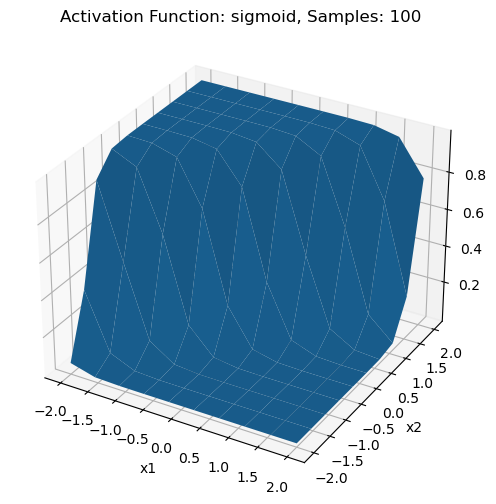

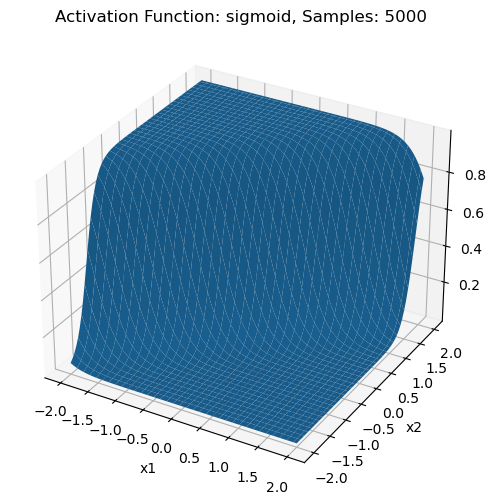

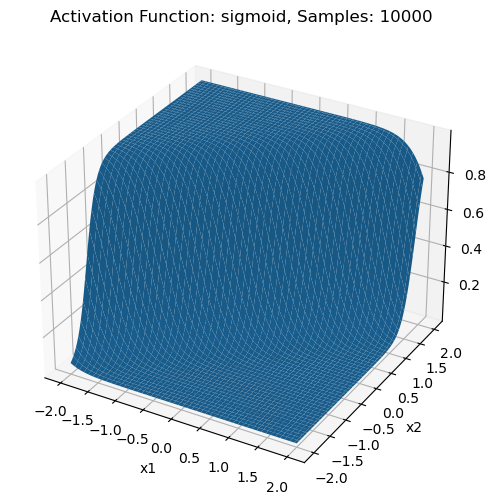

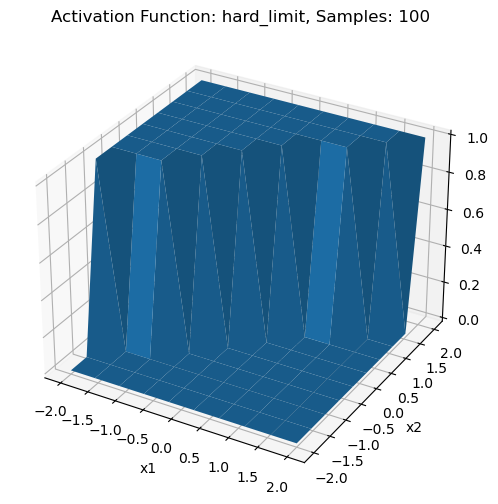

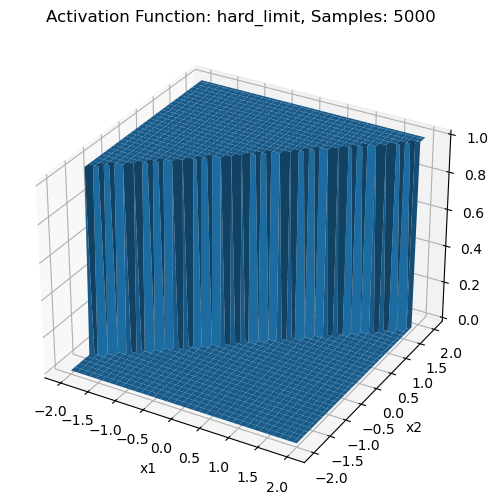

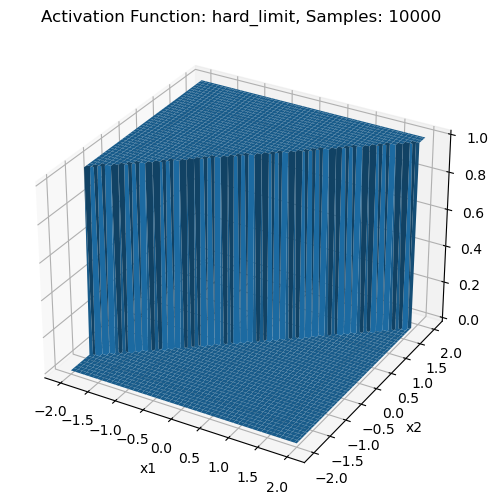

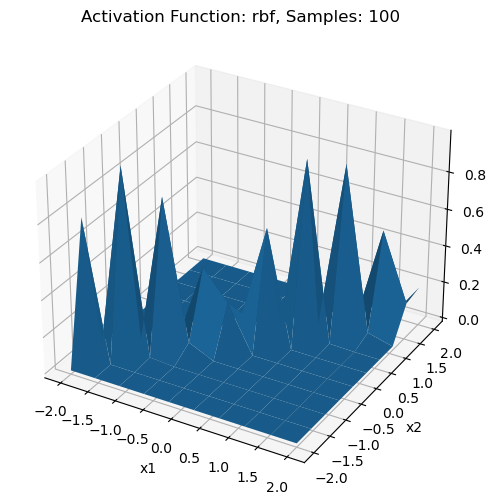

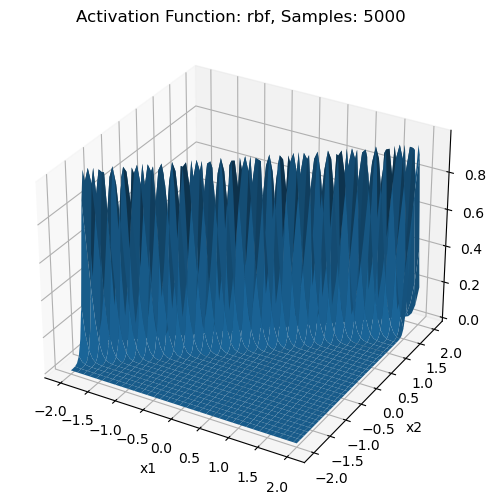

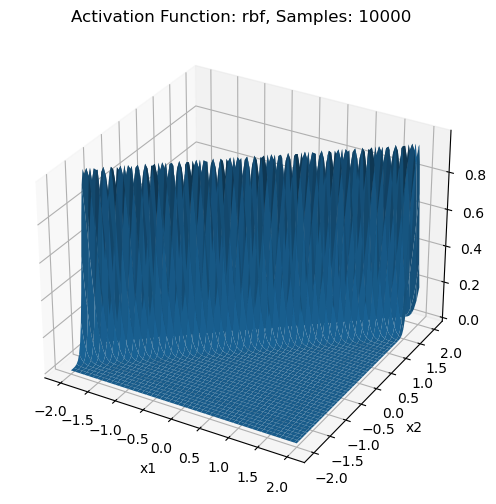

In [4]:
# Loop over activation functions ['sigmoid', 'hard_limit', 'rbf']
for act_fn in ['sigmoid', 'hard_limit', 'rbf']:
    
    # Loop over sample sizes [100, 5000, 10000]
    for n_samples in [100, 5000, 10000]:
        x1_values = np.linspace(-2, 2, int(np.sqrt(n_samples)))
        x2_values = np.linspace(-2, 2, int(np.sqrt(n_samples)))

        X1, X2 = np.meshgrid(x1_values, x2_values)
        
        Y = np.vectorize(perceptron)(X1, X2, act_fn)
        
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        #ax.view_init(30, 30)
        
        ax.plot_surface(X1, X2, Y)
        
        plt.title(f'Activation Function: {act_fn}, Samples: {n_samples}')
        plt.xlabel('x1')
        plt.ylabel('x2')
        ax.set_zlabel('y')
        
        plt.savefig(f'{act_fn}_Samples_{n_samples}.png')
        plt.show()